## Titanic: Machine Learning from Disaster
### Dataset Link: Titanic Dataset

#### Columns:
    * PassengerId: Unique identifier for each passenger.
    * Survived: 0 = No, 1 = Yes (Target variable)
    * Pclass: Ticket class (1st, 2nd, 3rd)
    * Name: Passenger's name
    * Sex: Gender of the passenger
    * Age: Age of the passenger
    * SibSp: Number of siblings/spouses aboard
    * Parch: Number of parents/children aboard
    * Ticket: Ticket number
    * Fare: Fare paid for the ticket
    * Cabin: Cabin number
    * Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Numerical data -: [PassengerId,Age,SibSp,Parch,Fare]
# categorical data -: [Survived,Pclass,Pclass,Name,Sex,Ticket,Cabin,Embarked]

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
median_age = data['Age'].median()
print(median_age)


28.0


In [11]:
data['Age'] = data['Age'].fillna(median_age)

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
data['Cabin_Letter'] = data['Cabin'].str[0]

In [19]:
def categorized_cabin_part(cabin_letter):
    if cabin_letter in ['A', 'B', 'C']:
        return 'Front'
    elif cabin_letter in ['D','E','F']:
        return 'Middle'
    elif cabin_letter in ['G', 'T']:
        return 'Rear'
    else:
        return 'Unknown'
    
data['Cabin_Part'] = data['Cabin_Letter'].apply(categorized_cabin_part)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,Cabin_Part
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Front
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Front
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Unknown


In [24]:
data['Cabin_Part'].fillna('Unknown', inplace=True)

In [25]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Cabin_Letter    687
Cabin_Part        0
dtype: int64

In [28]:
# Assuming 'data' is your DataFrame
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)

In [29]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Cabin_Letter    687
Cabin_Part        0
dtype: int64

## Analysis Ideas:

### Survival Analysis:

    * Analyze the survival rate based on different factors such as gender, class, and age.

### Family Size Impact:

    * Explore how the number of siblings/spouses or parents/children on board relates to survival.

### Fare Distribution:

    * Analyze the distribution of fares paid by passengers.

### Age Distribution:

    * Create age distribution charts and investigate the age of passengers on board.

### Embarkation Points:

    * Explore how the embarkation point relates to survival.

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,Cabin_Part
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Front
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Front
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Unknown


In [33]:
gender_survival = data.groupby('Sex')['Survived'].mean()
# Display the results
print("Survival Rate by Gender:")
print(gender_survival)

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [34]:
#females are more survived than males.

In [37]:
class_survival = data.groupby('Pclass')['Survived'].mean()
print("Survival Rate by class:")
print(class_survival)

Survival Rate by class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [39]:
bins = [0,18,30,50,100]
labels = ['0-18','18-30','30-50','50-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,Cabin_Part,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Unknown,18-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Front,30-50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Unknown,18-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Front,30-50
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Unknown,30-50


In [41]:
# Calculate survival rate by age group
age_survival = data.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival Rate by Age Group:")
print(age_survival)


Survival Rate by Age Group:
AgeGroup
0-18      0.539823
18-30     0.328125
30-50     0.417969
50-100    0.364865
Name: Survived, dtype: float64


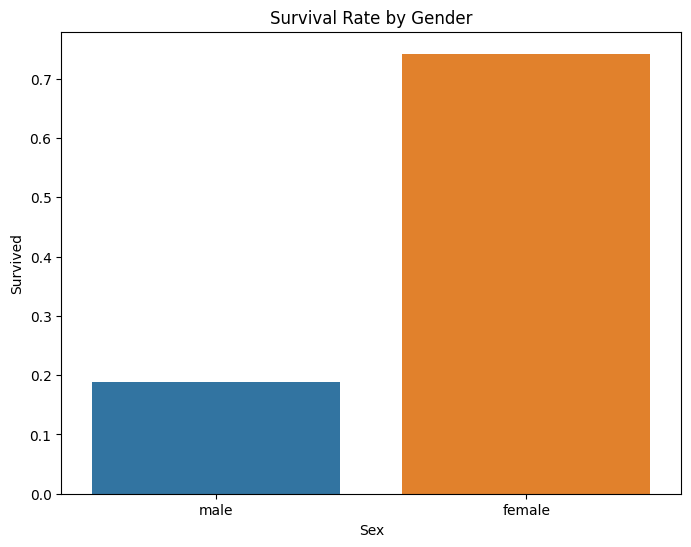

In [44]:
# Bar plot for survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=data, errorbar=None)
plt.title('Survival Rate by Gender')
plt.show()

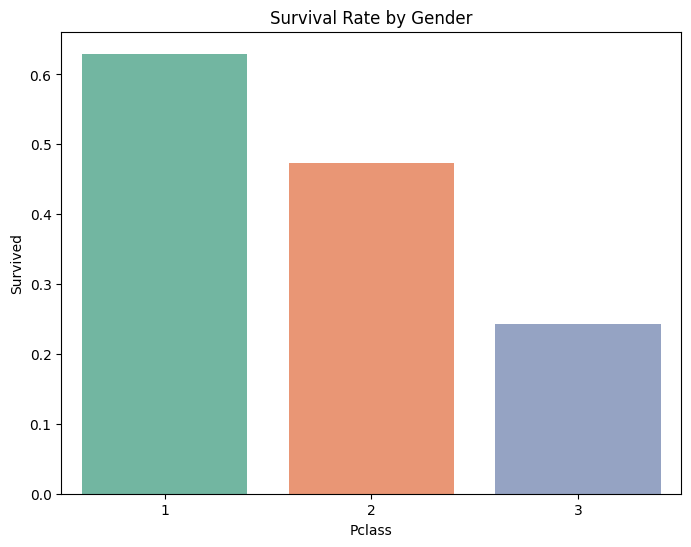

In [48]:
# Bar plot for survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=data, errorbar=None, palette = "Set2")
plt.title('Survival Rate by Gender')
plt.show()

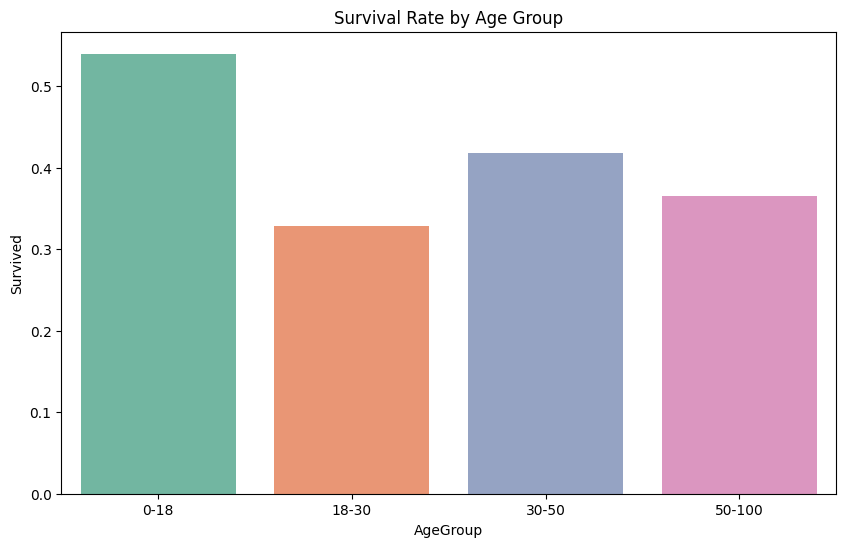

In [52]:
# Bar plot for survival rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=data, errorbar=None, palette = "Set2", order=labels)
plt.title('Survival Rate by Age Group')
plt.show()

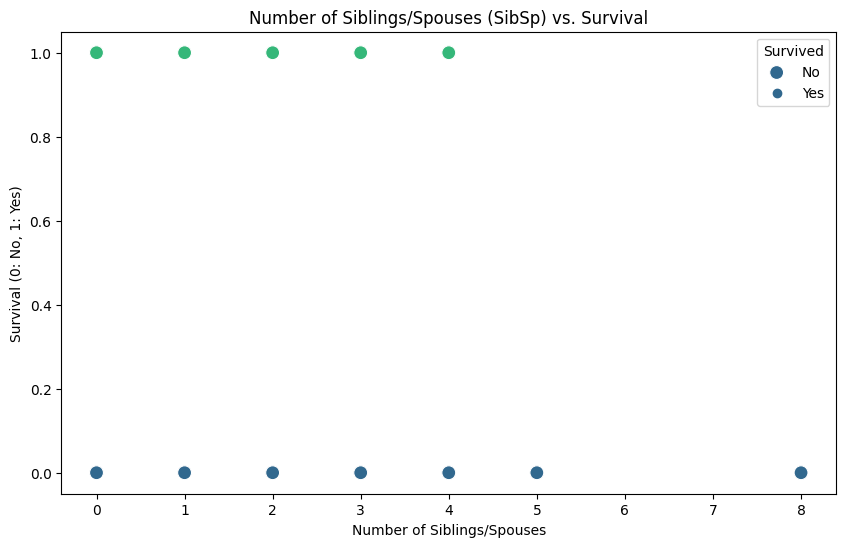

In [53]:
# Scatter plot for SibSp vs. Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SibSp', y='Survived', data=data, hue='Survived', palette='viridis', s=100)
plt.title('Number of Siblings/Spouses (SibSp) vs. Survival')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival (0: No, 1: Yes)')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


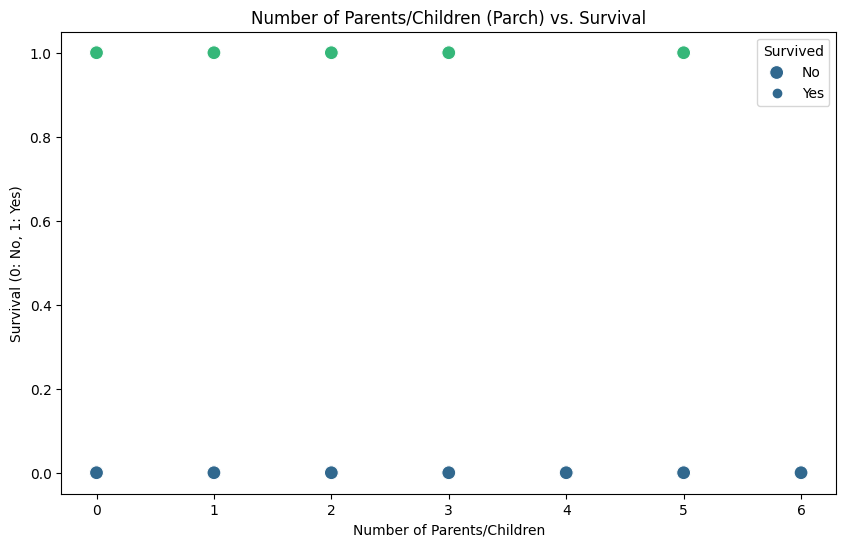

In [55]:
# Scatter plot for Parch vs. Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Parch', y='Survived', data=data, hue='Survived', palette='viridis', s=100)
plt.title('Number of Parents/Children (Parch) vs. Survival')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival (0: No, 1: Yes)')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()
